In [280]:
import re

import pandas as pd

import datetime

from bs4 import BeautifulSoup

import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [249]:
def extract_values (xml_values):
    values = []
    for val in xml_values:
        values.append(int(re.findall('\d+', str(val))[0]))
    return values

In [250]:
def extract_date_times (xml_values):
    date_times = []
    for i in xml_values:
        date_time = list(map(int, re.findall('\d+', str(i))))
        date_time = datetime.datetime(date_time[0],
                                      date_time[1],
                                      date_time[2],
                                      date_time[3],
                                      date_time[4],
                                      date_time[5])
        date_times.append(date_time)
    return date_times

In [251]:
with open('./activities/20170107-152751-Ride.gpx', 'r') as file:
    test_file = BeautifulSoup(file, 'lxml')

In [252]:
activity_points = test_file.find_all('trkpt')

In [253]:
latitudes, longitudes, elevations, times, heart_rates = [], [], [], [], []

for pt in activity_points:
    latitudes.append(pt['lat'])
    longitudes.append(pt['lon'])
    elevations.append(pt.ele)
    times.append(pt.time)
    heart_rates.append(pt.find_all('gpxtpx:hr')[0])

In [254]:
elevations = extract_values(elevations)
heart_rates = extract_values(heart_rates)
times = extract_date_times(times)

In [261]:
activity_dict = {'Latitude': latitudes,
                 'Longitude': longitudes,
                 'Elevation': elevations,
                 'Time_Stamp': times,
                 'HR': heart_rates}

In [262]:
activity_df = pd.DataFrame(activity_dict)

In [276]:
activity_df['HR_Zone'] = 'Recovery'
activity_df.loc[activity_df['HR'] > 118, 'HR_Zone'] = 'Z1'
activity_df.loc[activity_df['HR'] > 128, 'HR_Zone'] = 'Z2'
activity_df.loc[activity_df['HR'] > 147, 'HR_Zone'] = 'Z3'
activity_df.loc[activity_df['HR'] > 161, 'HR_Zone'] = 'Z4'
activity_df.loc[activity_df['HR'] > 175, 'HR_Zone'] = 'Z5'
activity_df.loc[activity_df['HR'] > 183, 'HR_Zone'] = 'Z6'

In [277]:
activity_df.head()

,Elevation,HR,Latitude,Longitude,Time_Stamp,HR_Zone
0,0,108,51.6056740,0.1279010,2017-01-07 15:27:51,Recovery
1,0,108,51.6056720,0.1279000,2017-01-07 15:27:52,Recovery
2,0,107,51.6057050,0.1278460,2017-01-07 15:28:02,Recovery
3,0,105,51.6057300,0.1277430,2017-01-07 15:28:05,Recovery
4,0,104,51.6057440,0.1277210,2017-01-07 15:28:06,Recovery


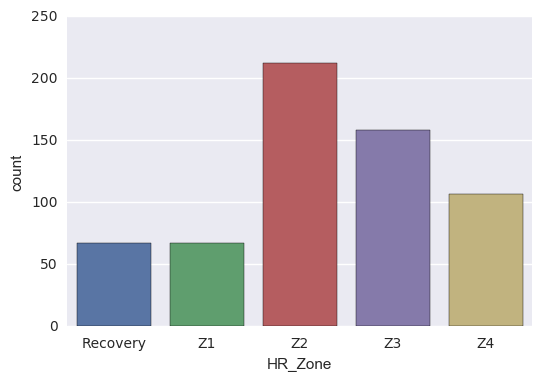

In [281]:
sns.countplot(activity_df['HR_Zone'])